<a href="https://colab.research.google.com/github/janpeter19/BPL_TEST2_Chemostat/blob/main/BPL_TEST2_Chemostat_fmpy_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BPL_TEST2_Chemostat script with FMPy ver 0.3.15

The key library FMPy v0.3.15 is installed.

After the installation a small application BPL_TEST2_Chemostat is loaded and run. You can continue with this example if you like.

In [ ]:
!lsb_release -a # Actual VM Ubuntu version used by Google

No LSB modules are available.
Distributor ID:	Ubuntu
Description:	Ubuntu 20.04.5 LTS
Release:	20.04
Codename:	focal


In [ ]:
%env PYTHONPATH=

env: PYTHONPATH=


In [ ]:
!wget https://repo.anaconda.com/miniconda/Miniconda3-py310_23.1.0-1-Linux-x86_64.sh
!chmod +x Miniconda3-py310_23.1.0-1-Linux-x86_64.sh
!bash ./Miniconda3-py310_23.1.0-1-Linux-x86_64.sh -b -f -p /usr/local
import sys
sys.path.append('/usr/local/lib/python3.10/site-packages/')

--2023-03-21 14:17:02--  https://repo.anaconda.com/miniconda/Miniconda3-py38_22.11.1-1-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.130.3, 104.16.131.3, 2606:4700::6810:8203, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.130.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64630241 (62M) [application/x-sh]
Saving to: ‘Miniconda3-py38_22.11.1-1-Linux-x86_64.sh’

Miniconda3-py38_22. 100%[===================>]  61.64M   110MB/s    in 0.6s    

2023-03-21 14:17:03 (110 MB/s) - ‘Miniconda3-py38_22.11.1-1-Linux-x86_64.sh’ saved [64630241/64630241]

PREFIX=/usr/local
Unpacking payload ...

Installing base environment...





Preparing transaction: - \ | / - done
Executing transaction: | / - \ | / - \ | / - \ | / - \ | / - \ | / - done
installation finished.


In [ ]:
!conda update -n base -c defaults conda --yes

Solving environment: \ | / - \ | / - \ | done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - conda


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2023.01.10 |       h06a4308_0         120 KB
    conda-23.1.0               |   py38h06a4308_0         942 KB
    conda-package-handling-2.0.2|   py38h06a4308_0         267 KB
    conda-package-streaming-0.7.0|   py38h06a4308_0          26 KB
    cryptography-39.0.1        |   py38h9ce1e76_0         1.4 MB
    ncurses-6.4                |       h6a678d5_0         914 KB
    openssl-1.1.1t             |       h7f8727e_0         3.7 MB
    pyopenssl-23.0.0           |   py38h06a4308_0          96 KB
    requests-2.28.1            |   py38h06a4308_1          99 KB
    sqlite-3.41.1              |       h5eee18b_0         1.2 MB
    urllib3-1.26.14            |   py38h0

In [ ]:
!conda --version
!python --version

conda 23.1.0
Python 3.8.15


In [ ]:
!conda install -c conda-forge fmpy --yes # Install the key package

Solving environment: \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ 

## Now specific installation run a simulation and notebook for that

Start with connecting to Github. Then upload the two files:

* FMU - BPL_TEST2_Chemostat_linux_om_me.fmu
* Setup-file - BPL_TEST2_Chemostat_fmpy_explore.py

In [ ]:
%%bash
git clone https://github.com/janpeter19/BPL_TEST2_Chemostat

Cloning into 'BPL_TEST2_Chemostat'...


In [ ]:
%cd BPL_TEST2_Chemostat

/content/BPL_TEST2_Chemostat/BPL_TEST2_Chemostat


## BPL_TEST2_Chemostat - demo

In [ ]:
run -i BPL_TEST2_Chemostat_fmpy_explore.py

Linux - run FMU pre-compiled OpenModelica 1.21.0

Model for bioreactor has been setup. Key commands:
 - par()       - change of parameters and initial values
 - init()      - change initial values only
 - simu()      - simulate and plot
 - newplot()   - make a new plot
 - show()      - show plot from previous simulation
 - disp()      - display parameters and initial values from the last simulation
 - describe()  - describe culture, broth, parameters, variables with values/units

Note that both disp() and describe() takes values from the last simulation

Brief information about a command by help(), eg help(simu)
Key system information is listed with the command system_info()


<Figure size 708.661x566.929 with 0 Axes>

In [ ]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [25/2.54, 20/2.54]

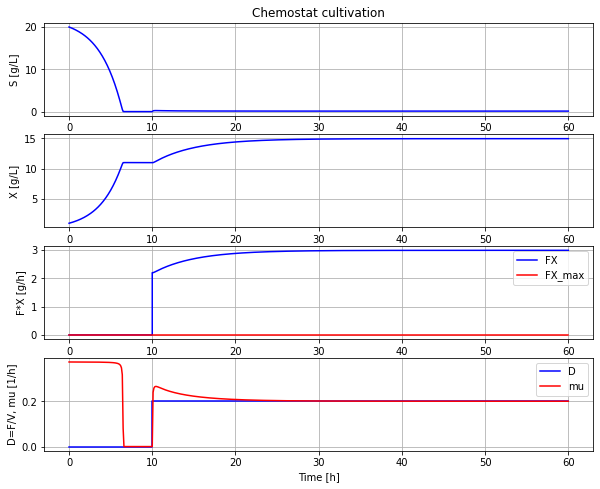

In [ ]:
newplot()
par(Y=0.50, qSmax=0.75,  Ks=0.1)         # Culture parameters
init(V_0=1.0, VX_0=1.0, VS_0=20)         # Bioreactor startup
par(S_in=30, t0=0, F0=0, t1=10, F1=0.2)  # Substrate feeding
simu(60)

In [ ]:
describe('parts')

['bioreactor', 'bioreactor.culture', 'D', 'dosagescheme', 'feedtank', 'harvesttank']


In [ ]:
describe('MSL')

MSL: 3.2.3 - used components: RealInput, RealOutput, CombiTimeTable, Types


In [ ]:
system_info()


System information
 -OS: Linux
 -Python: 3.9.16
 -Scipy: not installed in the notebook
 -FMPy: 0.3.15
 -FMU by: OpenModelica Compiler OpenModelica 1.21.0~dev-185-g9d983b8
 -FMI: 2.0
 -Type: ME
 -Name: BPL_TEST2.Chemostat
 -Generated: 2023-02-13T10:27:14Z
 -MSL: 3.2.3
 -Description: Bioprocess Library version 2.1.1-beta
 -Interaction: FMU-explore for FMPy version 0.9.7b
